In [6]:
import numpy as np
import matplotlib.pyplot as plt
import PhysicsFunctions as phy


#------- INITIAL DATA ------------
pinhole_diam_mm = [0.2, 0.4] #mm
pinhole_diam = np.array(pinhole_diam_mm) *10**(-3)

pinhole_to_target_cm = 109.55 #cm
pinhole_to_target = pinhole_to_target_cm *10**(-2)

laser_wavelength_nm = 633 #nm
laser_wavelength = laser_wavelength_nm * (10**(-9))

# 1 and 2 correspond to pinhole diam 0.2mm but the two separate measurements we did.

central_diam1 = (7+7.5)/2 #Averaged over two measurements 
central_radius1 = central_diam1/2 #This is the radius of the bright spot at the center of the pattern.
fringe_dist1_mm = [ 0,1,3,4,5.5,6.5,8.5,10,12,13,15,16,18,19.5,21.5,23,25,26] #mm [lower,upper,lower2,upper2,...] #9 fringes
fringe_dist1 = np.array(fringe_dist1_mm)*10**(-3)
mean_fringe_dist1 = [(fringe_dist1[i]+fringe_dist1[i+1])/2 for i in range(0,len(fringe_dist1),2)]

fringe_dist2_mm = [0,1,3,4,5.5,6.5,8,9.5,10.5,12,13.5,15,17,18]
fringe_dist2 = np.array(fringe_dist2_mm) *10**(-3)
mean_fringe_dist2 = [(fringe_dist2[i]+fringe_dist2[i+1])/2 for i in range(0,len(fringe_dist2),2)]





# Pinhole diam 0.4mm

central_diam2 = 3.5 #mm
central_radius2 = central_diam2/2
fringe_dist3_mm = [0,1,2,3,4,5,6,6.7,7.7,8.7,9.7,10.7] # 6 fringes
fringe_dist3 = np.array(fringe_dist3_mm) *10**(-3)
mean_fringe_dist3 = [(fringe_dist3[i]+fringe_dist3[i+1])/2 for i in range(0,len(fringe_dist3),2)]

print(mean_fringe_dist1,mean_fringe_dist2, mean_fringe_dist3)

#3-Zone Fresnel 

central_diam3 = 4
central_radius3 = central_diam3/2
fringe_dist4_mm = [0,1,3,3.5,6,7,8,8.5,10,10.5,12,13,14.5,16,18,19] # 6 fringes
fringe_dist4 = np.array(fringe_dist3_mm) *10**(-3)
mean_fringe_dist4 = [(fringe_dist4[i]+fringe_dist4[i+1])/2 for i in range(0,len(fringe_dist4),2)]



[0.0005, 0.0035, 0.006, 0.009250000000000001, 0.0125, 0.0155, 0.018750000000000003, 0.02225, 0.025500000000000002] [0.0005, 0.0035, 0.006, 0.00875, 0.01125, 0.014249999999999999, 0.0175] [0.0005, 0.0025, 0.0045000000000000005, 0.00635, 0.008199999999999999, 0.0102]


In [30]:
#------- Calculate Theta ---------
#Due to small angle approximations we can say that sin(theta) ~= tan(theta) and we can use the fringe distances
#and the pinhole-to-target distance to obtain theta

#calculate 0.2mm pinhole diameter

pinhole_diam_calculated_1 = []
for i in range(len(mean_fringe_dist1)):
    pinhole_diam_calculated_1.append((1.22 * laser_wavelength * pinhole_to_target) / mean_fringe_dist1[i])

pinhole_diam_calculated_1_std = np.std(pinhole_diam_calculated_1)
pinhole_diam_calculated_1_avg = np.average(pinhole_diam_calculated_1)

pinhole_diam_calculated_1_mm = []
for i in range(len(pinhole_diam_calculated_1)):
    pinhole_diam_calculated_1_mm.append(pinhole_diam_calculated_1[i] * 1000)

pinhole_diam_calculated_1_avg_mm = pinhole_diam_calculated_1_avg * 1000
pinhole_diam_calculated_1_std_mm = pinhole_diam_calculated_1_std * 1000

print("Calculated Diameter | Standard Deviation in calculations")
print(pinhole_diam_calculated_1_avg_mm, pinhole_diam_calculated_1_std_mm, end="\n\n")

#calculate 0.4mm pinhole diameter

pinhole_diam_calculated_2 = []
for i in range(len(mean_fringe_dist2)):
    pinhole_diam_calculated_2.append((1.22 * laser_wavelength * pinhole_to_target) / mean_fringe_dist2[i])

pinhole_diam_calculated_2_std = np.std(pinhole_diam_calculated_2)
pinhole_diam_calculated_2_avg = np.average(pinhole_diam_calculated_2)

pinhole_diam_calculated_2_mm = []
for i in range(len(pinhole_diam_calculated_2)):
    pinhole_diam_calculated_2_mm.append(pinhole_diam_calculated_2[i] * 1000)
    
pinhole_diam_calculated_2_avg_mm = pinhole_diam_calculated_2_avg * 1000
pinhole_diam_calculated_2_std_mm = pinhole_diam_calculated_2_std * 1000

print("Calculated Diameter | Standard Deviation in calculations")
print(pinhole_diam_calculated_2_avg_mm, pinhole_diam_calculated_2_std_mm)


Calculated Diameter | Standard Deviation in calculations
0.26719823523189346 0.5076305759190247

Calculated Diameter | Standard Deviation in calculations
0.33633448810275685 0.556810460994293


[1.69202166, 0.24171737999999995, 0.14100180499999998, 0.09146063027027025, 0.0676808664, 0.05458134387096774, 0.04512057759999999, 0.038022958651685396, 0.03317689529411764]


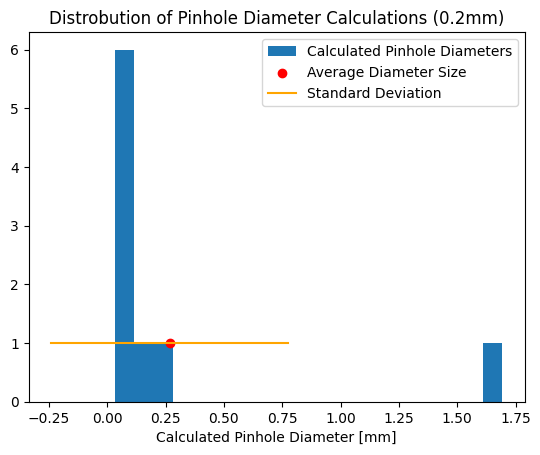

In [40]:
#Create plot to represent data for 0.2mm pinhole
print(pinhole_diam_calculated_1_mm)

fig, ax = plt.subplots()
fig.suptitle(None)
ax.set_title("Distrobution of Pinhole Diameter Calculations (0.2mm)")
ax.set_ylabel("")
ax.set_xlabel("Calculated Pinhole Diameter [mm]")

plt.hist(pinhole_diam_calculated_1_mm,20,label="Calculated Pinhole Diameters")
plt.scatter(pinhole_diam_calculated_1_avg_mm,1,c='red',label="Average Diameter Size")
plt.plot([pinhole_diam_calculated_1_avg_mm-pinhole_diam_calculated_1_std_mm,pinhole_diam_calculated_1_avg_mm,pinhole_diam_calculated_1_avg_mm+pinhole_diam_calculated_1_std_mm],[1,1,1],c="orange",label="Standard Deviation")
ax.legend()
plt.show()

[1.69202166, 0.24171737999999995, 0.14100180499999998, 0.09668695199999998, 0.07520096266666666, 0.05936918105263158, 0.04834347599999999]


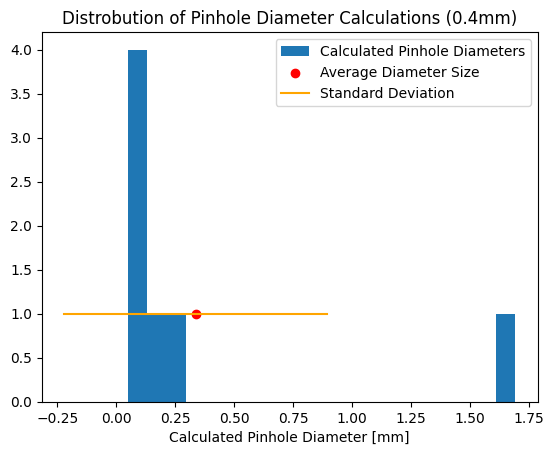

In [39]:
#Create plot to represent data for 0.4mm pinhole
print(pinhole_diam_calculated_2_mm)

fig, ax = plt.subplots()
fig.suptitle(None)
ax.set_title("Distrobution of Pinhole Diameter Calculations (0.4mm)")
ax.set_ylabel("")
ax.set_xlabel("Calculated Pinhole Diameter [mm]")

plt.hist(pinhole_diam_calculated_2_mm,20,label="Calculated Pinhole Diameters")
plt.scatter(pinhole_diam_calculated_2_avg_mm,1,c='red',label="Average Diameter Size")
plt.plot([pinhole_diam_calculated_2_avg_mm-pinhole_diam_calculated_2_std_mm,pinhole_diam_calculated_2_avg_mm,pinhole_diam_calculated_2_avg_mm+pinhole_diam_calculated_2_std_mm],[1,1,1],c="orange",label="Standard Deviation")
ax.legend()
plt.show()